In [1]:
pip install pyspark


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 317.3/317.3 MB 4.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... - \ done
  Created wheel for pyspark: filename=pyspark-3.5.3-py2.py3-none-any.whl size=317840629 sha256=720699bd50fb0e77d6af0b9473789b4dc292635a22521845e5986b7663f6b342
  Stored in directory: /root/.cache/pip/wheels/1b/3a/92/28b93e2fbfdbb07509ca4d6f50c5e407f48dce4ddbda69a4ab
Successfully built pyspark
Note: you may need to restart the kernel to use updated packages.


# Importing Libraries

In [2]:
from pyspark.sql import SparkSession, functions as F
from pyspark import SparkConf, SparkContext
from pyspark.sql.types import *
from pyspark.sql.functions import *
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

**Building Session**

In [3]:
spark = SparkSession.builder.appName('Pyspark | TempView Practice').getOrCreate()

Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).
24/09/25 09:26:21 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable


In [4]:
spark

**Loading Dataset**

In [5]:
df = spark.read.csv('/kaggle/input/pyspark-tempview-practice-csv/Pyspark _ Predict Salary - Sheet1.csv', inferSchema = True, header = True)

# Explorartory Data Analysis

In [6]:
df.show()

+---------+---+----------+------+
|     Name|Age|Experience|Salary|
+---------+---+----------+------+
|     Adam| 32|         8| 17000|
|     John| 31|         7| 16000|
|    Chris| 34|        10| 30000|
|  Charles| 21|         3| 12000|
|     Paul| 24|         5| 15000|
|    David| 25|         5| 15000|
|  Indiana| 43|        12| 32000|
|    Linda| 32|         8| 17000|
|Elizabwth| 20|         2| 11000|
+---------+---+----------+------+



# Experience VS Salary

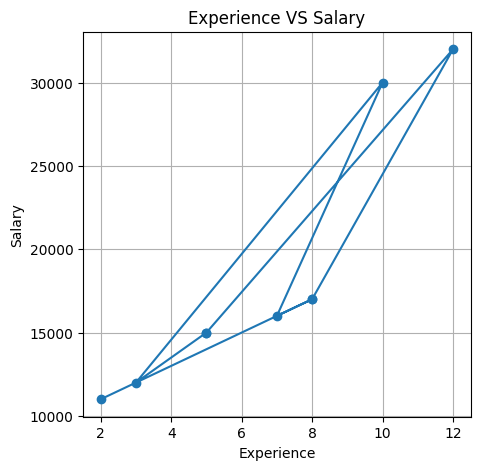

In [7]:
pandas_df = df.toPandas()
plt.figure(figsize=(5,5))
plt.plot(pandas_df['Experience'], pandas_df['Salary'], marker='o')
plt.title("Experience VS Salary")
plt.xlabel('Experience')
plt.ylabel('Salary')
plt.grid(True)
plt.show()

In [8]:
df_grouped_by_experience = df.groupBy(col("Experience")).count()
df_grouped_by_experience.show()

+----------+-----+
|Experience|count|
+----------+-----+
|        12|    1|
|         3|    1|
|         5|    2|
|         8|    2|
|         7|    1|
|        10|    1|
|         2|    1|
+----------+-----+



In [9]:
df_grouped_by_age = df.groupBy(col('Age')).count()
df_grouped_by_age.show()

+---+-----+
|Age|count|
+---+-----+
| 31|    1|
| 34|    1|
| 20|    1|
| 43|    1|
| 25|    1|
| 24|    1|
| 21|    1|
| 32|    2|
+---+-----+



# Creating Temporary View Table

In [10]:
df.createOrReplaceTempView('company')

In [11]:
# Selecting The Age Column from table
filtering_age = spark.sql('select Age from Company')
filtering_age.show()

# Selecting The Name Column from table
filtering_name = spark.sql('select Name from Company')
filtering_name.show()

# Selecting The Salary Column from table
filtering_salary = spark.sql('Select Salary from Company')
filtering_salary.show()

# Selecting The Experience Column from table
filtering_experience = spark.sql('Select Experience from Company')
filtering_experience.show()

+---+
|Age|
+---+
| 32|
| 31|
| 34|
| 21|
| 24|
| 25|
| 43|
| 32|
| 20|
+---+

+---------+
|     Name|
+---------+
|     Adam|
|     John|
|    Chris|
|  Charles|
|     Paul|
|    David|
|  Indiana|
|    Linda|
|Elizabwth|
+---------+

+------+
|Salary|
+------+
| 17000|
| 16000|
| 30000|
| 12000|
| 15000|
| 15000|
| 32000|
| 17000|
| 11000|
+------+

+----------+
|Experience|
+----------+
|         8|
|         7|
|        10|
|         3|
|         5|
|         5|
|        12|
|         8|
|         2|
+----------+



In [12]:
print('Age Greater than 30 Years!')
age_greater_30 = spark.sql('Select Age from company where Age > 30')
age_greater_30.show()

print('Age lesser than 30 Years!')
age_lesser_30 = spark.sql('Select Age from company where Age < 30')
age_lesser_30.show()


print('Experience Greater than 5 Years!')
experience_greater_5 = spark.sql('Select Experience from company where Experience > 5')
experience_greater_5.show()


print('Experience Lesser than 5 Years!')
experience_lesser_5 = spark.sql('Select Experience from Company where Experience < 5')
experience_lesser_5.show()

print('Salary Greater than 15 Thousand!')
salary_greater_15k = spark.sql('Select Salary from company where Salary > 15000')
salary_greater_15k.show()

print('Salary Lesser than 15 Thousand!')
salary_lesser_15k = spark.sql('Select Salary from company where Salary < 15000')
salary_lesser_15k.show()

Age Greater than 30 Years!
+---+
|Age|
+---+
| 32|
| 31|
| 34|
| 43|
| 32|
+---+

Age lesser than 30 Years!
+---+
|Age|
+---+
| 21|
| 24|
| 25|
| 20|
+---+

Experience Greater than 5 Years!
+----------+
|Experience|
+----------+
|         8|
|         7|
|        10|
|        12|
|         8|
+----------+

Experience Lesser than 5 Years!
+----------+
|Experience|
+----------+
|         3|
|         2|
+----------+

Salary Greater than 15 Thousand!
+------+
|Salary|
+------+
| 17000|
| 16000|
| 30000|
| 32000|
| 17000|
+------+

Salary Lesser than 15 Thousand!
+------+
|Salary|
+------+
| 12000|
| 11000|
+------+



In [13]:
count = spark.sql('Select Count(*) as total_rows from company')
count.show()

+----------+
|total_rows|
+----------+
|         9|
+----------+



In [14]:
count_age = spark.sql('Select Count(Age) from company')
count_age.show()

count_name = spark.sql('Select Count(Name) from company')
count_name.show()

count_salary = spark.sql('Select count(Salary) from company')
count_salary.show()

count_experience = spark.sql('select count(Experience) from company')
count_experience.show()

+----------+
|count(Age)|
+----------+
|         9|
+----------+

+-----------+
|count(Name)|
+-----------+
|          9|
+-----------+

+-------------+
|count(Salary)|
+-------------+
|            9|
+-------------+

+-----------------+
|count(Experience)|
+-----------------+
|                9|
+-----------------+



In [15]:
df = spark.sql('Select * from company')
df.show()

+---------+---+----------+------+
|     Name|Age|Experience|Salary|
+---------+---+----------+------+
|     Adam| 32|         8| 17000|
|     John| 31|         7| 16000|
|    Chris| 34|        10| 30000|
|  Charles| 21|         3| 12000|
|     Paul| 24|         5| 15000|
|    David| 25|         5| 15000|
|  Indiana| 43|        12| 32000|
|    Linda| 32|         8| 17000|
|Elizabwth| 20|         2| 11000|
+---------+---+----------+------+



In [16]:
print('Filtering Salary Based on Experience greater then or Equal to 10 Years!')
filtering_salary_based_on_experience = spark.sql('Select Salary from company where Experience >= 10')
filtering_salary_based_on_experience.show()


print('Filtering Names Based On Age greater then or equal to 30!')
filtering_age_based_on_name = spark.sql('Select Name from company where Age >= 30')
filtering_age_based_on_name.show()

Filtering Salary Based on Experience greater then or Equal to 10 Years!
+------+
|Salary|
+------+
| 30000|
| 32000|
+------+

Filtering Names Based On Age greater then or equal to 30!
+-------+
|   Name|
+-------+
|   Adam|
|   John|
|  Chris|
|Indiana|
|  Linda|
+-------+



In [17]:
print("Information Of People Who's Experience is Greater then 5 Years!")
info_of_people_exper_greater_then_5 = spark.sql('Select * from company where Experience > 5')
info_of_people_exper_greater_then_5.show()

print("Information of Peples who's Age is greater than 30 Years!")
info_of_people_age_greater_than_30 = spark.sql('Select * from company where Age > 30')
info_of_people_age_greater_than_30.show()

Information Of People Who's Experience is Greater then 5 Years!
+-------+---+----------+------+
|   Name|Age|Experience|Salary|
+-------+---+----------+------+
|   Adam| 32|         8| 17000|
|   John| 31|         7| 16000|
|  Chris| 34|        10| 30000|
|Indiana| 43|        12| 32000|
|  Linda| 32|         8| 17000|
+-------+---+----------+------+

Information of Peples who's Age is greater than 30 Years!
+-------+---+----------+------+
|   Name|Age|Experience|Salary|
+-------+---+----------+------+
|   Adam| 32|         8| 17000|
|   John| 31|         7| 16000|
|  Chris| 34|        10| 30000|
|Indiana| 43|        12| 32000|
|  Linda| 32|         8| 17000|
+-------+---+----------+------+



# **Salary Manipulation**

In [18]:
print('Average Salary Of Peoples In Company!')
avg_salary = spark.sql('select Avg(Salary) as Avg_Salary from company')
avg_salary.show()

print('Max Salary of Peoples In Company!')
max_salary = spark.sql('Select max(Salary) as Max_Salary from company')
max_salary.show()

print('Min Salary Of Poeples in Company!')
min_salary = spark.sql('Select min(Salary) as Min_Salary from Company')
min_salary.show()

print('Average Age of Peoples in Company!')
avg_age = spark.sql("Select avg(Age) as Avgerage_Age from company")
avg_age.show()

print('Max Age of Peoples in Company!')
max_age = spark.sql('Select max(age) as Max_Age from company')
max_age.show()

print('Min Age of Peoples in Company!')
min_age = spark.sql('select min(age) as Min_Age from company')
min_age.show()



Average Salary Of Peoples In Company!
+------------------+
|        Avg_Salary|
+------------------+
|18333.333333333332|
+------------------+

Max Salary of Peoples In Company!
+----------+
|Max_Salary|
+----------+
|     32000|
+----------+

Min Salary Of Poeples in Company!
+----------+
|Min_Salary|
+----------+
|     11000|
+----------+

Average Age of Peoples in Company!
+-----------------+
|     Avgerage_Age|
+-----------------+
|29.11111111111111|
+-----------------+

Max Age of Peoples in Company!
+-------+
|Max_Age|
+-------+
|     43|
+-------+

Min Age of Peoples in Company!
+-------+
|Min_Age|
+-------+
|     20|
+-------+



# **Adding Bonus Column**

In [19]:
adding_bonus = spark.sql('Select *, Salary * 5 as Bonus from company!')
adding_bonus.show()

+---------+---+----------+------+------+
|     Name|Age|Experience|Salary| Bonus|
+---------+---+----------+------+------+
|     Adam| 32|         8| 17000| 85000|
|     John| 31|         7| 16000| 80000|
|    Chris| 34|        10| 30000|150000|
|  Charles| 21|         3| 12000| 60000|
|     Paul| 24|         5| 15000| 75000|
|    David| 25|         5| 15000| 75000|
|  Indiana| 43|        12| 32000|160000|
|    Linda| 32|         8| 17000| 85000|
|Elizabwth| 20|         2| 11000| 55000|
+---------+---+----------+------+------+



# **Salary Manipulation**

In [20]:
print('Total Salary!')
total_salary = spark.sql('Select SUM(Salary) as Total_Salary from company')
total_salary.show()

print('Average Salary!')
avg_salary = spark.sql('Select avg(Salary) as Avg_Salary from company')
avg_salary.show()

print("Min Salary!")
min_salary = spark.sql('Select min(Salary) as Min_Salary from company')
min_salary.show()

print('Max Salary!')
max_salary = spark.sql('Select Max(Salary) as Max_Salary from company')
max_salary.show()

Total Salary!
+------------+
|Total_Salary|
+------------+
|      165000|
+------------+

Average Salary!
+------------------+
|        Avg_Salary|
+------------------+
|18333.333333333332|
+------------------+

Min Salary!
+----------+
|Min_Salary|
+----------+
|     11000|
+----------+

Max Salary!
+----------+
|Max_Salary|
+----------+
|     32000|
+----------+



# **Experience Manipulation**

In [21]:
print('Total Experience!')
total_experi = spark.sql('Select SUM(Experience) as Total_Experience from company')
total_experi.show()

print('Average Experience!')
avg_experi = spark.sql('Select avg(Experience) as Avgerage_Experience from company')
avg_experi.show()

print('Min Experience')
min_experi = spark.sql('Select min(Experience) as Min_Experience from company')
min_experi.show()

print('Max Experience!')
max_experi = spark.sql('Select max(Experience) as Max_Experience from company')
max_experi.show()

Total Experience!
+----------------+
|Total_Experience|
+----------------+
|              60|
+----------------+

Average Experience!
+-------------------+
|Avgerage_Experience|
+-------------------+
|  6.666666666666667|
+-------------------+

Min Experience
+--------------+
|Min_Experience|
+--------------+
|             2|
+--------------+

Max Experience!
+--------------+
|Max_Experience|
+--------------+
|            12|
+--------------+



# **Age Manipulation**

In [22]:
print('Total Age!')
total_age = spark.sql('Select sum(Age) as Total_Age from company')
total_age.show()

print('Average Age!')
avg_age = spark.sql('Select avg(Age) as Avg_Age from company')
avg_age.show()

print('Max Age!')
max_age = spark.sql('Select max(Age) as Max_Age from company')
max_age.show()

print('Min Age!')
min_age = spark.sql('Select min(Age) as Min_Age from company')
min_age.show()

Total Age!
+---------+
|Total_Age|
+---------+
|      262|
+---------+

Average Age!
+-----------------+
|          Avg_Age|
+-----------------+
|29.11111111111111|
+-----------------+

Max Age!
+-------+
|Max_Age|
+-------+
|     43|
+-------+

Min Age!
+-------+
|Min_Age|
+-------+
|     20|
+-------+



In [23]:
df.show()

+---------+---+----------+------+
|     Name|Age|Experience|Salary|
+---------+---+----------+------+
|     Adam| 32|         8| 17000|
|     John| 31|         7| 16000|
|    Chris| 34|        10| 30000|
|  Charles| 21|         3| 12000|
|     Paul| 24|         5| 15000|
|    David| 25|         5| 15000|
|  Indiana| 43|        12| 32000|
|    Linda| 32|         8| 17000|
|Elizabwth| 20|         2| 11000|
+---------+---+----------+------+



In [24]:
adding_salary_category_df = df.withColumn('Salary_Category', when (col('Salary') > 15000, "High Salary").otherwise('Low Salary'))
adding_salary_category_df.show()

+---------+---+----------+------+---------------+
|     Name|Age|Experience|Salary|Salary_Category|
+---------+---+----------+------+---------------+
|     Adam| 32|         8| 17000|    High Salary|
|     John| 31|         7| 16000|    High Salary|
|    Chris| 34|        10| 30000|    High Salary|
|  Charles| 21|         3| 12000|     Low Salary|
|     Paul| 24|         5| 15000|     Low Salary|
|    David| 25|         5| 15000|     Low Salary|
|  Indiana| 43|        12| 32000|    High Salary|
|    Linda| 32|         8| 17000|    High Salary|
|Elizabwth| 20|         2| 11000|     Low Salary|
+---------+---+----------+------+---------------+



In [25]:
adding_experience_category_df = adding_salary_category_df.withColumn('Experience_Category', when (col('Experience') > 5, 'Senior').otherwise('Junior'))
adding_experience_category_df.show()

+---------+---+----------+------+---------------+-------------------+
|     Name|Age|Experience|Salary|Salary_Category|Experience_Category|
+---------+---+----------+------+---------------+-------------------+
|     Adam| 32|         8| 17000|    High Salary|             Senior|
|     John| 31|         7| 16000|    High Salary|             Senior|
|    Chris| 34|        10| 30000|    High Salary|             Senior|
|  Charles| 21|         3| 12000|     Low Salary|             Junior|
|     Paul| 24|         5| 15000|     Low Salary|             Junior|
|    David| 25|         5| 15000|     Low Salary|             Junior|
|  Indiana| 43|        12| 32000|    High Salary|             Senior|
|    Linda| 32|         8| 17000|    High Salary|             Senior|
|Elizabwth| 20|         2| 11000|     Low Salary|             Junior|
+---------+---+----------+------+---------------+-------------------+



In [26]:
adding_age_category_df = adding_experience_category_df.withColumn("Age_Category", when (col('Age') > 30, 'Senior Employee').otherwise('Junior Employees'))
adding_age_category_df.show()

+---------+---+----------+------+---------------+-------------------+----------------+
|     Name|Age|Experience|Salary|Salary_Category|Experience_Category|    Age_Category|
+---------+---+----------+------+---------------+-------------------+----------------+
|     Adam| 32|         8| 17000|    High Salary|             Senior| Senior Employee|
|     John| 31|         7| 16000|    High Salary|             Senior| Senior Employee|
|    Chris| 34|        10| 30000|    High Salary|             Senior| Senior Employee|
|  Charles| 21|         3| 12000|     Low Salary|             Junior|Junior Employees|
|     Paul| 24|         5| 15000|     Low Salary|             Junior|Junior Employees|
|    David| 25|         5| 15000|     Low Salary|             Junior|Junior Employees|
|  Indiana| 43|        12| 32000|    High Salary|             Senior| Senior Employee|
|    Linda| 32|         8| 17000|    High Salary|             Senior| Senior Employee|
|Elizabwth| 20|         2| 11000|     Low S